# Finding Best Town in Pittsburgh Based on Fast Food Establishments
## by Kyle Bello

## *Breif Intoduction*
You may not know this, but humans need food to survive! As young adults, we spend almost [67 minutes](https://www.usda.gov/media/blog/2011/11/22/how-much-time-do-americans-spend-eating) per day eating food! 

While we would like the best, most delicious food much of the time, sometimes we just need food... *fast*.

To find the best town in Pittsburgh, I examined the data from [this survey](https://data.wprdc.org/dataset/allegheny-county-fast-food) of fast food restaurants by zip code conducted by Alleghany County.

The survey took data from all zip codes in Alleghany County by name, including smaller fast food places as well as chains.

## Preparing The Data
Lets start with the basic imports needed for data analysis:

In [38]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

My next step is to read in the data from the study, titled as ``fast_food`` in the code.

In [30]:
fast_food = pd.read_csv("fastfoodalleghenycountyupdatexy2.csv", sep=",") #reading in csv
fast_food['ZIP Code'] = fast_food['ZIP Code'].astype(str) #changing data type for merge with map
ff_by_zip = fast_food.groupby('ZIP Code')['Name'].count() #grouping total count of fast food places by zip

you can also see on the second line of that code, I had to use ``.astype(str)`` on the data in the ZIP Code column of ``fast_food``.

This is because on the map file (We will see this soon), the zip code data was stored differently. This type casting allows me to now use both dataset's zip codes togther.

In [31]:
county_map = gp.read_file("ZipCodeShapeFile/Allegheny_County_Zip_Code_Boundaries.shp") #reading in map file
county_map = county_map.merge(fast_food.groupby('ZIP Code')['Name'].count().reset_index(), left_on='ZIP', right_on='ZIP Code') #merging our map zip code data w/ fast food zip code data

After reading in the map file, that second line of code is... rough.

I am merging the zip code data of ``fast_food`` and ``county_map`` using the ``.merge`` function of pandas.

``left_on = 'ZIP'`` gets the zip code data from ``county_map``

``right_on = 'ZIP Code'`` gets the zip code data from ``fast_food``

Lets make our map!

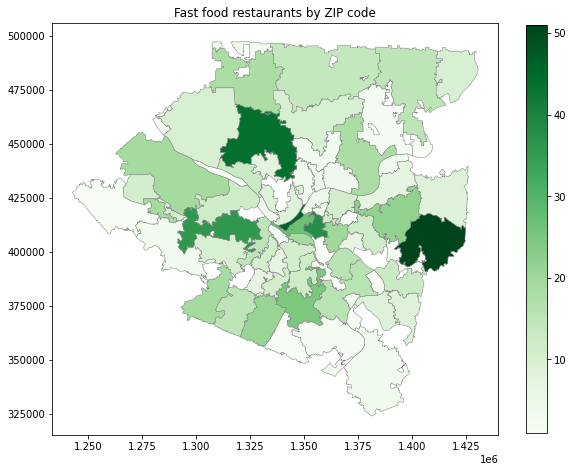

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) #creating figure/plot
county_map.plot(column='Name', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.5') #plotting map
ax.axis('on')
ax.set_title('Fast food restaurants by ZIP code') #setting title
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=county_map['Name'].min(), vmax=county_map['Name'].max())) ##creating color bar/index
sm._A = []
cbar = fig.colorbar(sm, shrink=.75) #shrinking it
plt.show()

Currently, if you're like me and don't really know Pittsburgh, I don't know what's going on!

Looking at our map plot, there are a few zip codes with *many* fast food establishments.

As well, there are many zip codes that don't have very many at all!

Let's take a look at those.

# Data Analyis

First, lets look at the bottom zip codes to see which towns have the fewest establishments

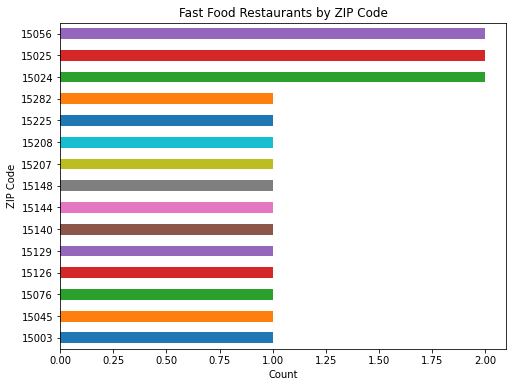

In [33]:
bottom_zips = ff_by_zip.nsmallest(15) #getting the bottom smallest zip codes
ax = bottom_zips.plot(kind='barh', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14'], figsize=(8,6)) #making bar plot
ax.set_xlabel('Count') #setting axis
ax.set_ylabel('ZIP Code')
plt.title('Fast Food Restaurants by ZIP Code')
plt.show()

As we can see, there is a 12 zip code tie for least amount of fast food establishments!

However, this data isn't very intersting, lets move on.

Next, lets look at which zip codes have the most fast food restaurants!

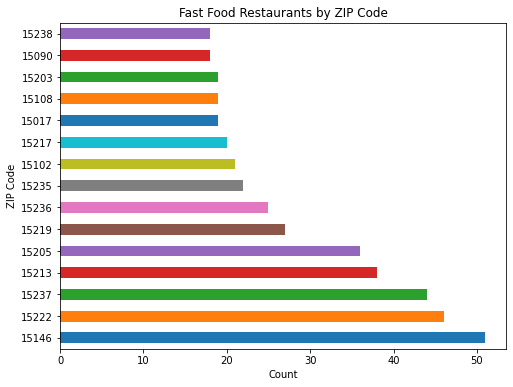

In [35]:
bottom_zips = ff_by_zip.nlargest(15) #getting the bottom smallest zip codes
ax = bottom_zips.plot(kind='barh', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14'], figsize=(8,6)) #making bar plot
ax.set_xlabel('Count') #setting axis
ax.set_ylabel('ZIP Code')
plt.title('Fast Food Restaurants by ZIP Code')
plt.show()

Much more intersting! Let's take a look at our top 10 zip codes:

# Results

In [37]:
bottom_zips.head(10)

ZIP Code
15146    51
15222    46
15237    44
15213    38
15205    36
15219    27
15236    25
15235    22
15102    21
15217    20
Name: Name, dtype: int64

#### Zip Codes With the Most Fast Food Establishments
    10. 15217 - Pittsburgh (Squirrel Hill)
    9. 15102 - Bethel Park
    8. 15235 - Penn Hills
    7. 15236 - West MIfflin
    6. 15219 - Pittsburgh (Hill District)
    5. 15205 - Pittsburgh (Crafton)
    4. 15213 - Oakland
    3. 15237 - McKnight
    2. 15222 - Strip District
    1. 15146 - Monroeville

From this data, Monroeville is the town with the most fast food restaurants. However, it did not beat out the rest by much.

All of these places offer a wide variety of restaurants to choose from, making these all great canidates for the best town in Alleghany County.